In [1]:
import os
import pandas as pd
import sys
sys.path.append('../src/models')
from utils import evaluate_miscalibration_area
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# evals_dir = '../src/models/evals_new/'
# evals_dir = '../src/models/evals_new/evals_new_gp_ky/'
# evals_dir = '../src/models/evals_new/evals_new_engaging/' # evidential only
evals_dir = '../src/models/evals_new/evals_new_supercloud/'

preds_files = [file for file in os.listdir(evals_dir) if 'preds' in file \
               and not 'evidential' in file]
preds_files

['gb1_CNN_dropout_gb1_3_test_preds.csv',
 'gb1_linearBayesianRidge_sampled_test_preds.csv',
 'gb1_CNN_mve_gb1_1_test_preds.csv',
 'aav_CNN_dropout_aav_5_test_preds.csv',
 'gb1_CNN_mve_gb1_2_test_preds.csv',
 'gb1_linearBayesianRidge_two_vs_rest_test_preds.csv',
 'aav_linearBayesianRidge_sampled_test_preds.csv',
 'meltome_CNN_mve_meltome_mixed_test_preds.csv',
 'aav_CNN_dropout_aav_2_test_preds.csv',
 'aav_linearBayesianRidge_mut_des_test_preds.csv',
 'gb1_CNN_dropout_gb1_4_test_preds.csv',
 'gb1_CNN_ensemble_gb1_4_test_preds.csv',
 'gb1_CNN_mve_gb1_4_test_preds.csv',
 'gb1_CNN_mve_gb1_3_test_preds.csv',
 'aav_linearBayesianRidge_seven_vs_many_test_preds.csv',
 'gb1_CNN_dropout_gb1_1_test_preds.csv',
 'meltome_CNN_dropout_meltome_mixed_test_preds.csv',
 'meltome_linearBayesianRidge_mixed_split_short999_test_preds.csv',
 'gb1_linearBayesianRidge_one_vs_rest_test_preds.csv',
 'aav_CNN_dropout_aav_7_test_preds.csv',
 'gb1_CNN_ensemble_gb1_2_test_preds.csv',
 'gb1_linearBayesianRidge_three_

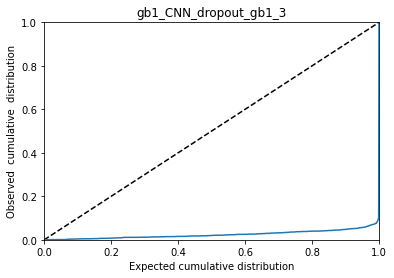

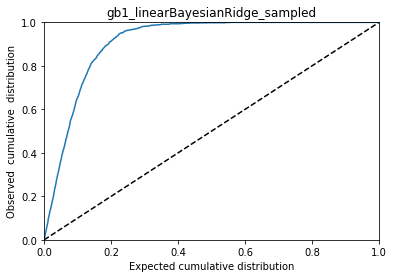

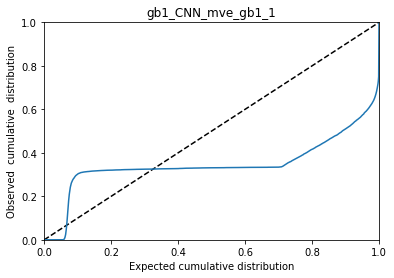

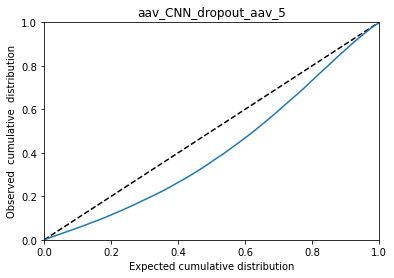

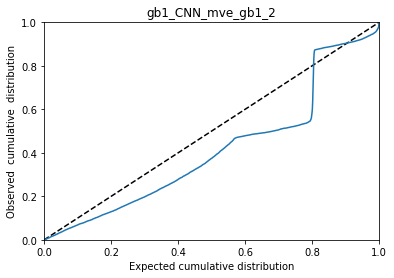

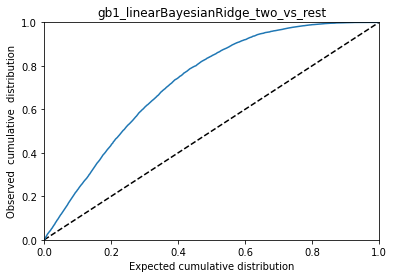

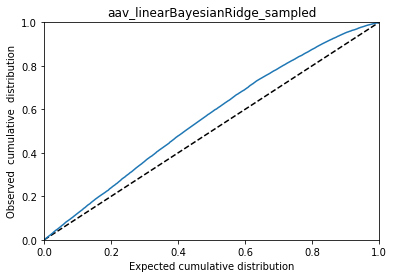

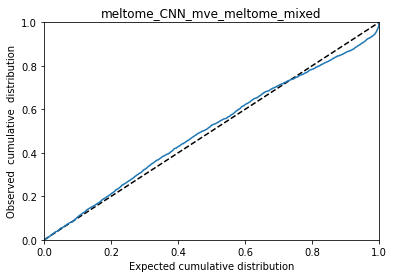

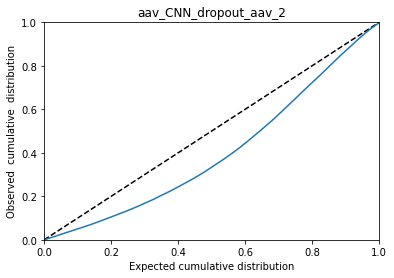

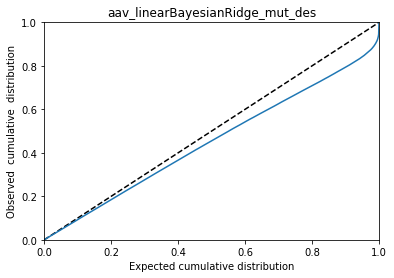

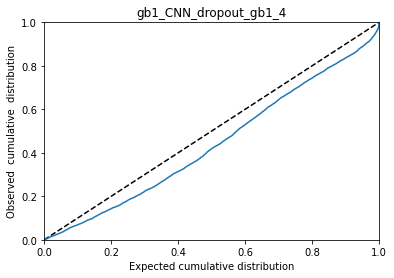

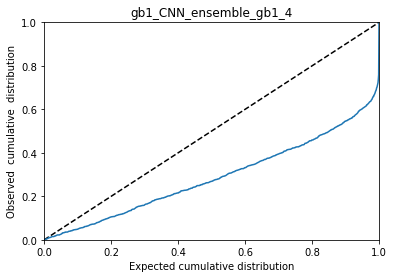

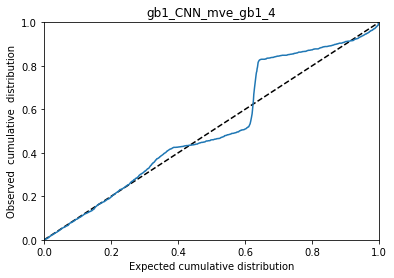

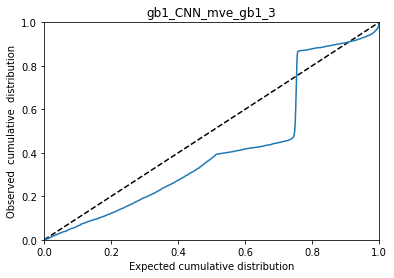

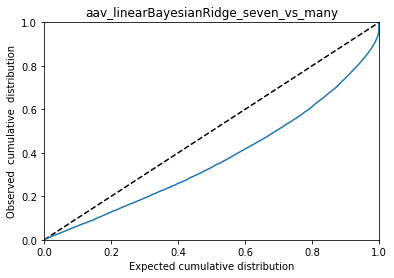

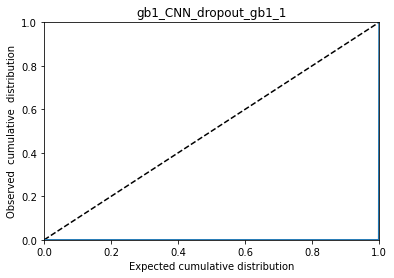

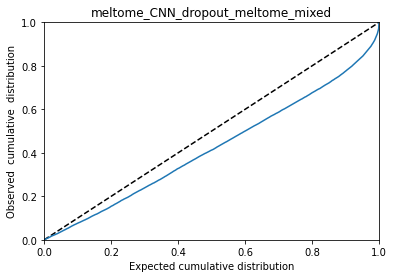

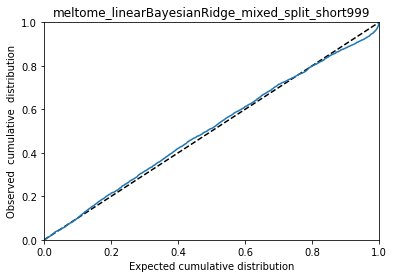

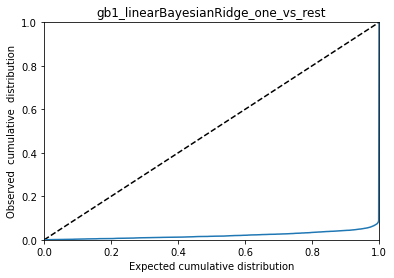

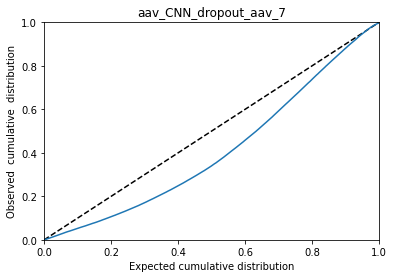

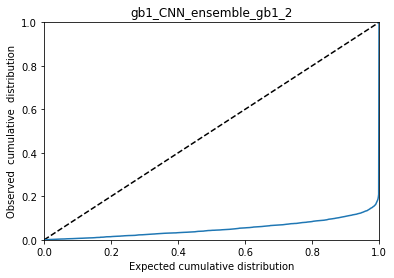

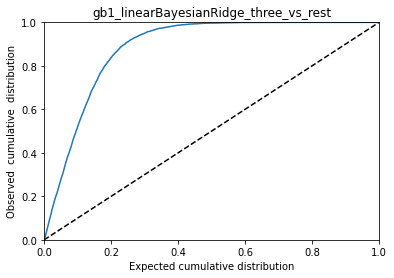

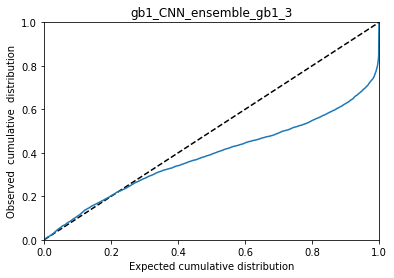

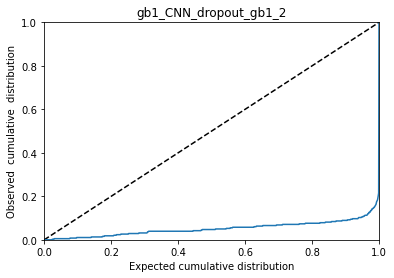

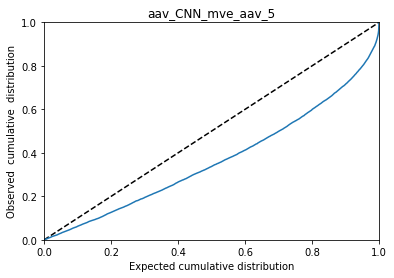

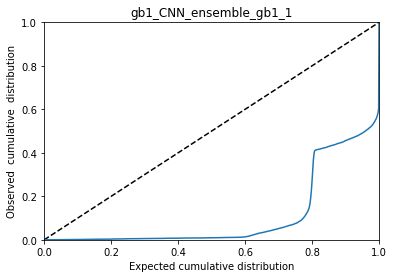

In [3]:
for file_name in preds_files:
    df = pd.read_csv(evals_dir+file_name)

    abs_error = df['residual']
    uncertainty = df['preds_std']

    ma_dict = evaluate_miscalibration_area(abs_error, uncertainty)

    frac_under_thresh = ma_dict['fraction_under_thresholds']
    thresh = ma_dict['thresholds']
    ma = ma_dict['miscalibration_area']

    plt.plot(thresh, thresh, '--k')
    plt.plot(thresh, frac_under_thresh)
    plt.xlabel('Expected cumulative distribution')
    plt.ylabel('Observed  cumulative  distribution')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.title(file_name[:-15])
    
    plt.show()

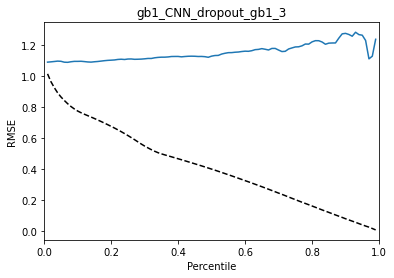

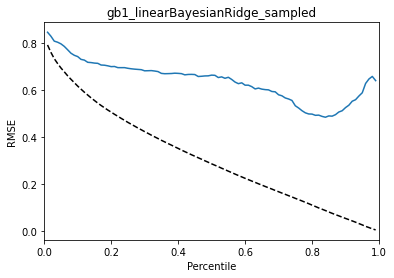

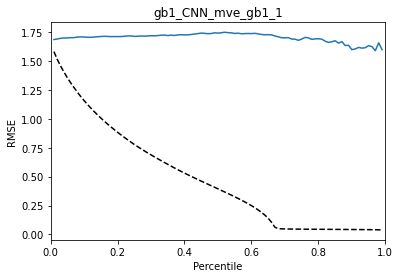

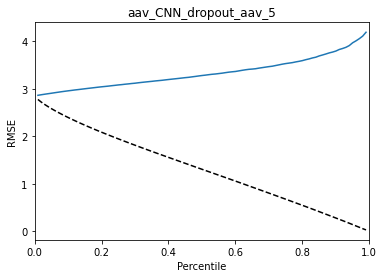

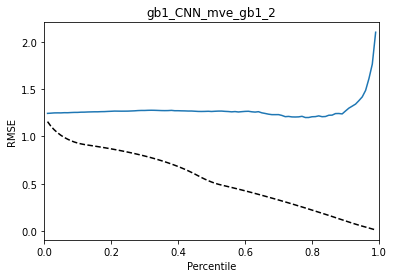

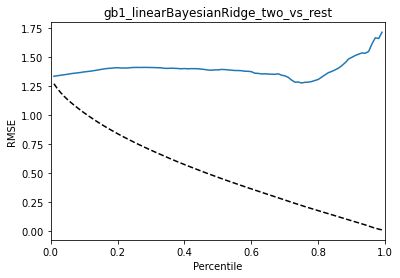

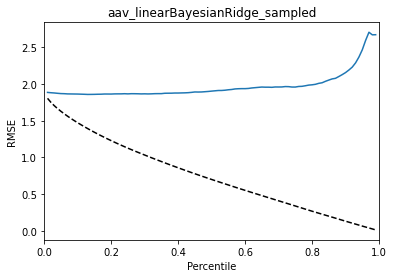

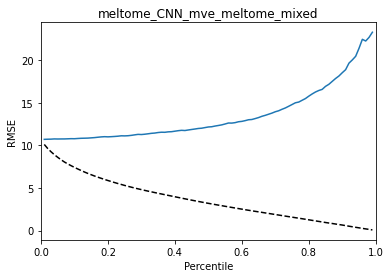

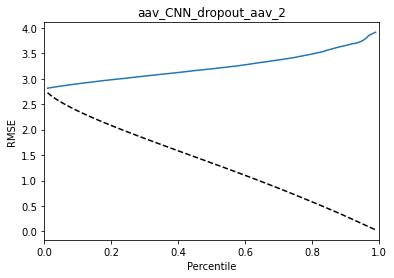

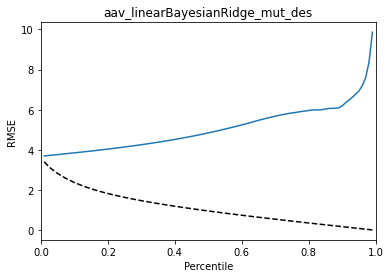

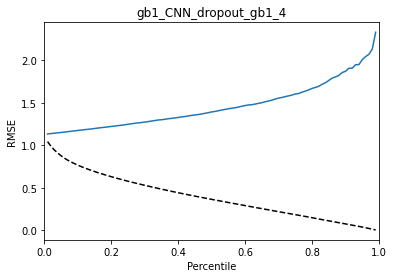

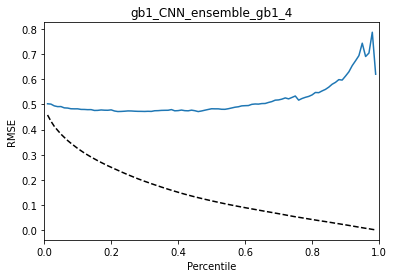

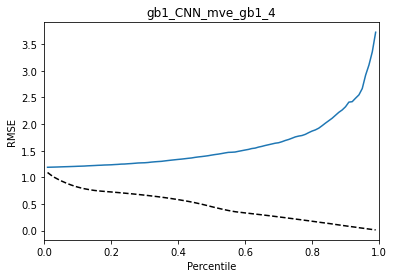

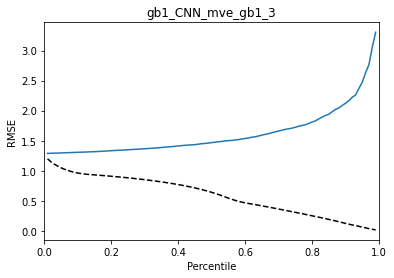

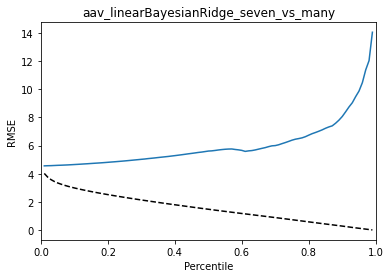

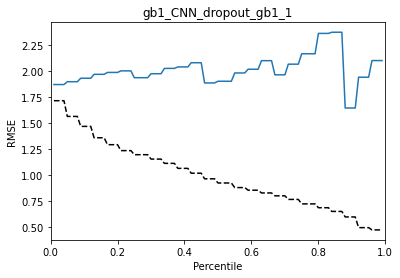

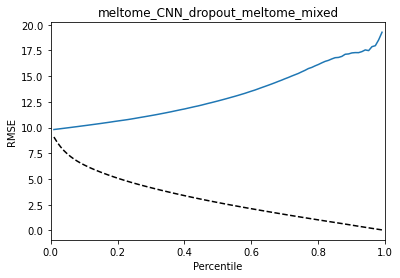

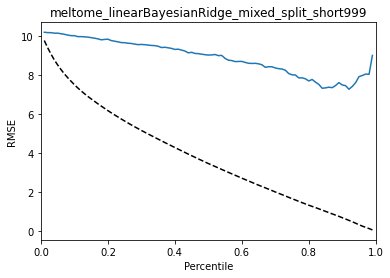

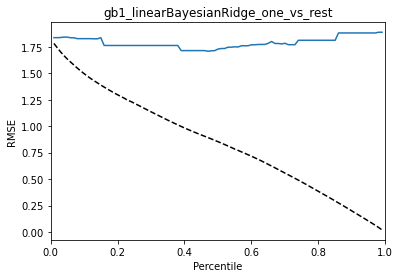

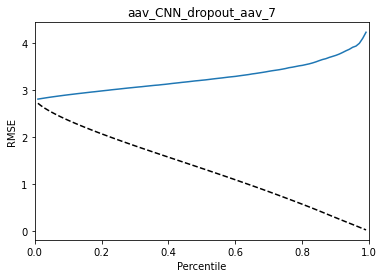

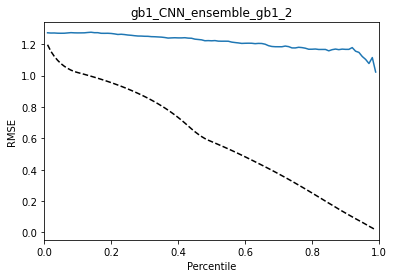

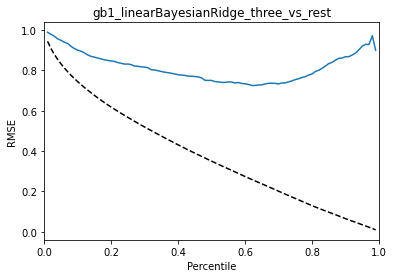

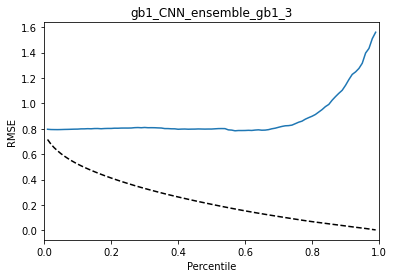

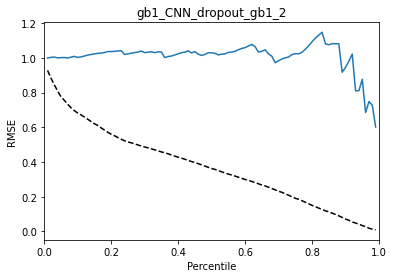

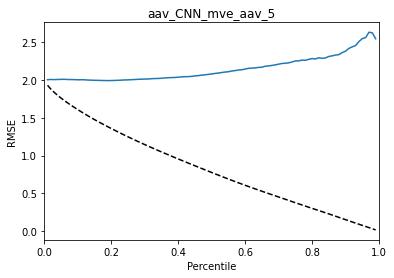

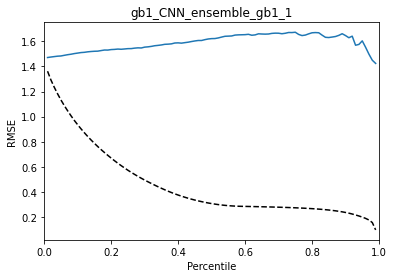

In [4]:
qs = np.arange(0.01,1,0.01)

for file_name in preds_files:
    df = pd.read_csv(evals_dir+file_name)

    rmses = []
    rmses_oracle = []
    for q in qs:
        dfq = df[df.preds_std > df.preds_std.quantile(q)].copy()
        try:
            rmses.append(mean_squared_error(dfq.y_test, dfq.preds_mean, squared=False))
        except:
            rmses.append(np.nan)
        dfqo = df[df.residual < df.residual.quantile(1-q)].copy()
        try:
            rmses_oracle.append(mean_squared_error(dfqo.y_test, dfqo.preds_mean, squared=False))
        except:
            rmses_oracle.append(np.nan)

    plt.plot(qs, rmses)
    plt.plot(qs, rmses_oracle, '--k')
    plt.xlabel('Percentile')
    plt.ylabel('RMSE')
    plt.xlim((0,1))
    plt.title(file_name[:-15])
    
    plt.show()

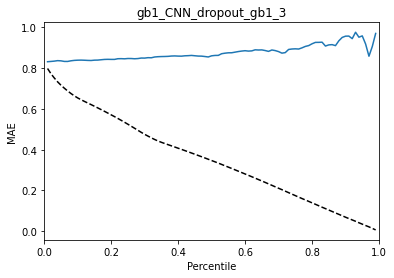

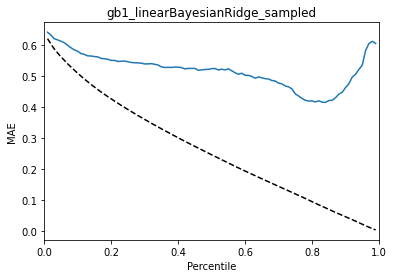

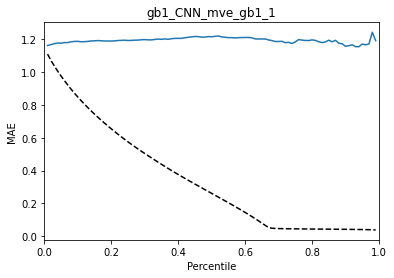

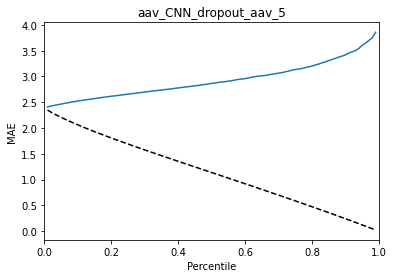

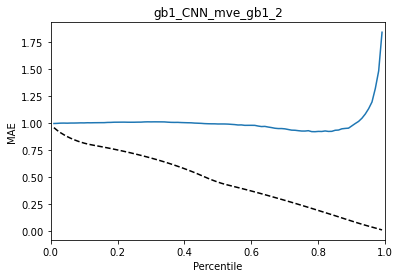

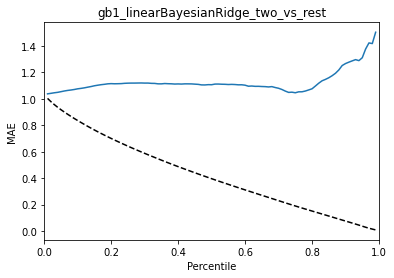

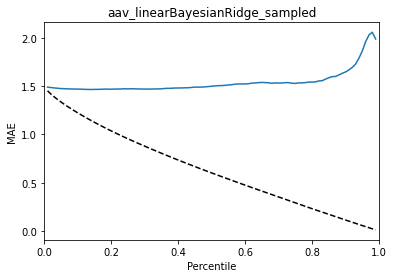

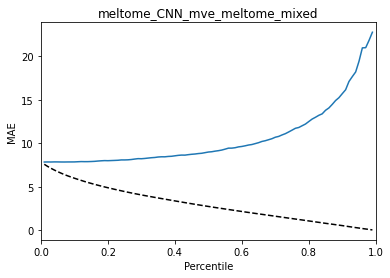

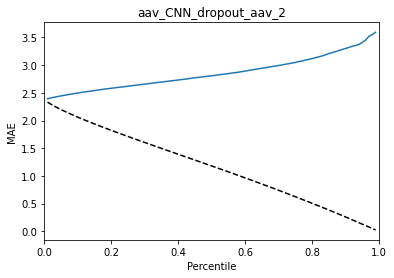

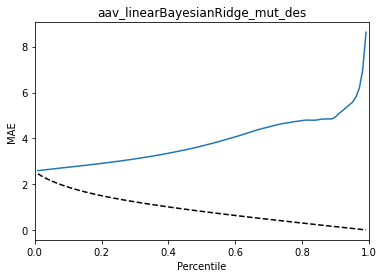

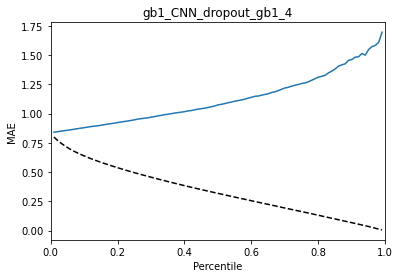

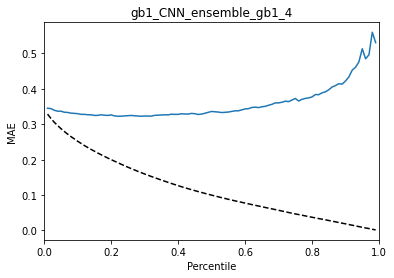

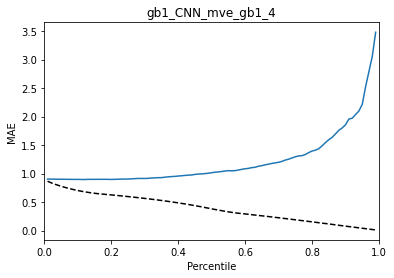

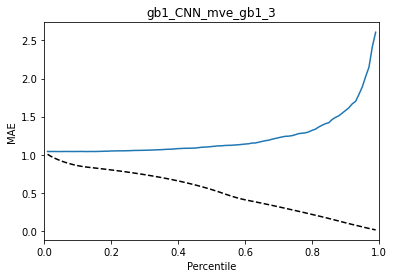

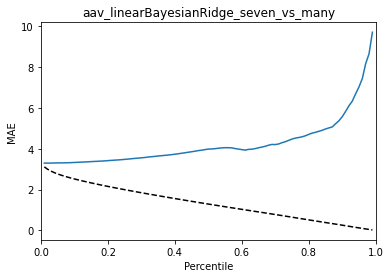

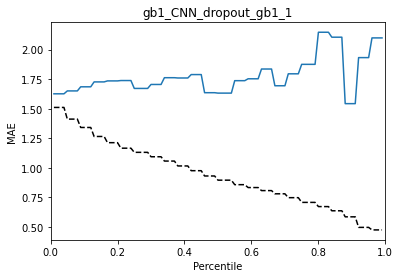

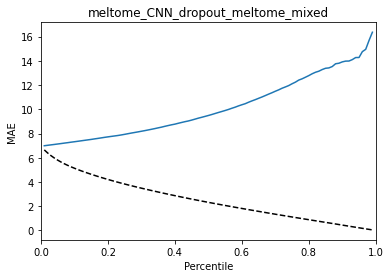

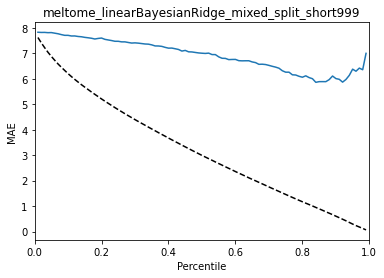

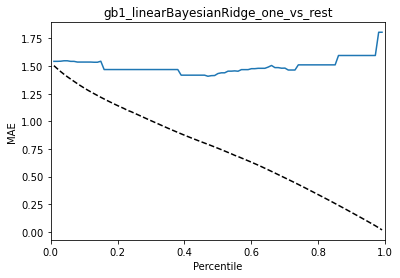

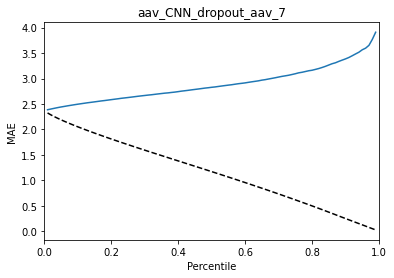

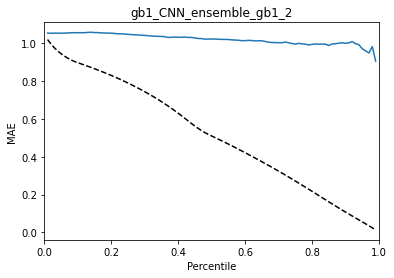

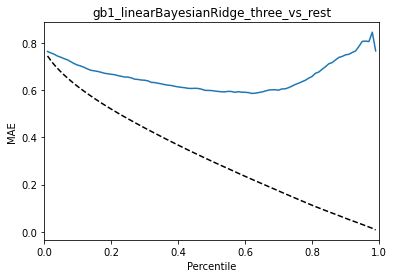

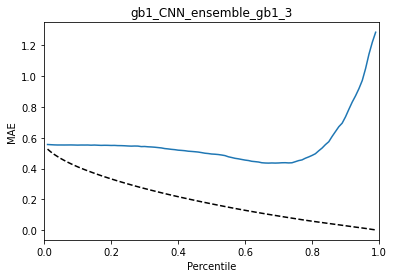

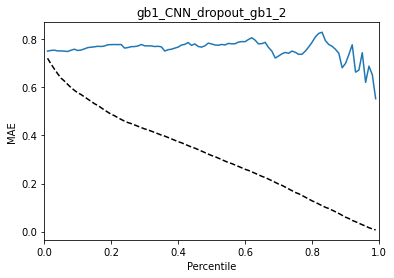

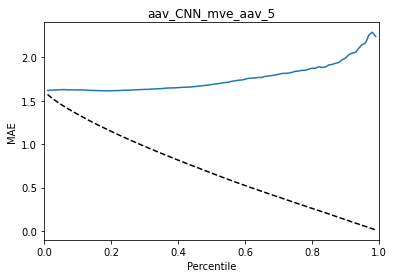

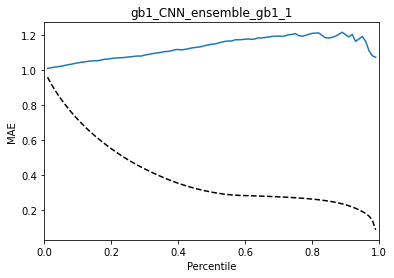

In [5]:
qs = np.arange(0.01,1,0.01)

for file_name in preds_files:
    df = pd.read_csv(evals_dir+file_name)

    rmses = []
    rmses_oracle = []
    for q in qs:
        dfq = df[df.preds_std > df.preds_std.quantile(q)]
        try:
            rmses.append(mean_absolute_error(dfq.y_test, dfq.preds_mean))
        except:
            rmses.append(np.nan)
        dfqo = df[df.residual < df.residual.quantile(1-q)]
        try:
            rmses_oracle.append(mean_absolute_error(dfqo.y_test, dfqo.preds_mean))
        except:
            rmses_oracle.append(np.nan)

    plt.plot(qs, rmses)
    plt.plot(qs, rmses_oracle, '--k')
    plt.xlabel('Percentile')
    plt.ylabel('MAE')
    plt.xlim((0,1))
    plt.title(file_name[:-15])
    
    plt.show()